In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.experimental.algorithms.mocmaes import MO_CMAES
from pymoo.factory import get_reference_directions
from pymoo.optimize import minimize
from pymoo.problems.multi import ZDT1, TNK
from pymoo.visualization.scatter import Scatter
from pysamoo.experimental.ParDen import ParDen

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
gaussian_process = GaussianProcessRegressor()

problem = ZDT1(n_var=10)

ref_dirs = get_reference_directions("das-dennis", 2, n_points=20)

algorithm = NSGA2(pop_size=20, n_offsprings=10, ref_dirs=ref_dirs)

# algorithm = MO_CMAES(mu=20, sigma=0.1, lambda_=10)

algorithm = ParDen(algorithm,
                   n_initial_doe=20,
                   surrogate=gaussian_process, 
                   maxfill=False,
                   look_ahead=True)

res = minimize(
    problem,
    algorithm,
    ('n_evals', 250),
    seed=1,
    verbose=True)

n_gen |  n_eval |     igd      |      gd      |      hv      |     beta     |  nds_score   |   n_front   
    1 |      20 |  1.911750382 |  2.574224274 |  0.00000E+00 |        -1/-1 |  0.392727935 |            5
    2 |      24 |  1.906561836 |  1.783590923 |  0.00000E+00 |        9/120 |  0.362764599 |            6
    3 |      28 |  1.906561836 |  2.090646276 |  0.00000E+00 |       17/179 |  0.413339540 |            7
    4 |      33 |  0.805653983 |  1.843061532 |  0.005853304 |        12/65 |  0.625210955 |            6
    5 |      40 |  0.699386553 |  1.177693779 |  0.005853304 |        14/39 |  0.418003222 |            4
    6 |      45 |  0.699386553 |  1.061616931 |  0.005853304 |        12/48 |  0.163047349 |            4
    7 |      47 |  0.699386553 |  0.857860516 |  0.005853304 |         6/61 |  0.096251577 |            4
    8 |      48 |  0.699386553 |  0.697481301 |  0.005853304 |          2/3 |  0.063717273 |            5
    9 |      49 |  0.279672509 |  0.563563074 

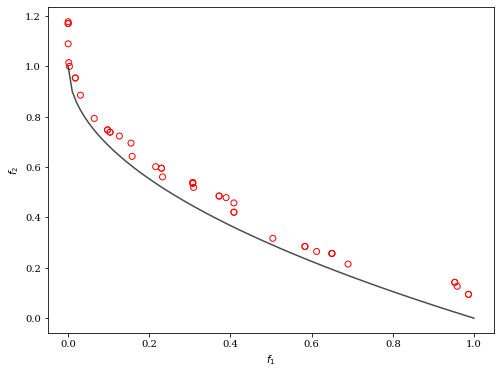

In [2]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [3]:
# algorithm.setup(problem, seed=2, termination=('n_evals', 250))

# for k in range(3):
#     algorithm.next()
    # print(algorithm.n_gen)

In [4]:
# res.F